# YouTube Revenue
## Use multiple regression on YouTube data to decide whether or not to include pre-roll ads
### Project for Quantitative Methods

## Part 1
### Load, clean, merge, and summarize data

In [1]:
# create function to build in data
folderdata = function(paths){ 
  dat = NULL 
  for(i in 1:length(paths)){ 
    this = read.csv(paths[i],header=TRUE)
    this = cbind(this, paths[i])
    dat = rbind(dat, this) 
  } 
  return(dat) 
} 

In [2]:
# read in data
# change file paths as necessary
base_rev <- "~/Desktop/School/Fall 2018/MSBC 5030/Project 3/YouTube2013Attention/Revenues"
rev_path <- list.files(base_rev, full.names = TRUE)
revs <- folderdata(rev_path)
names(revs)

base_vid <- "~/Desktop/School/Fall 2018/MSBC 5030/Project 3/YouTube2013Attention/Videos"
vid_path <- list.files(base_vid, full.names = TRUE)
vids <- folderdata(vid_path)
names(vids)

[1] "Date"                     "Total.estimated.earnings"
[3] "AFV.earnings"             "YouTube.earnings"        
[5] "Transactions"             "paths[i]"

[1] "Date"                      "Views"                    
[3] "Estimated.minutes.watched" "Average.view.duration"    
[5] "Unique.cookies"            "paths[i]"

In [4]:
# make "Date" variable dates and not factors
revs$Date <- as.Date(revs$Date, "%b %d, %Y")

date1 <- as.Date(vids$Date, format= "%b %d, %Y")
date2 <- as.Date(vids$Date,format = "%d-%b-%y")

date1[is.na(date1)] <- date2[!is.na(date2)]
vids$Date <- date1

In [5]:
# rename paths to video ids to create common variable
# start values differ on path
revs$video_id <- substring(revs$`paths[i]`,95)
vids$video_id <- substring(vids$`paths[i]`,91)

revs$video_id <- substr(revs$video_id,1,nchar(revs$video_id)-4)
vids$video_id <- substr(vids$video_id,1,nchar(vids$video_id)-4)

# drop paths columns
revs$`paths[i]` <- NULL
vids$`paths[i]` <- NULL

In [6]:
# convert factors to numeric
revs$Transactions<-gsub("\\$","", revs$Transactions)
revs$YouTube.earnings <- gsub("\\$","", revs$YouTube.earnings)
revs$AFV.earnings <- gsub("\\$","", revs$AFV.earnings)
revs$Total.estimated.earnings <- gsub("\\$","",revs$Total.estimated.earnings)

revs$Transactions <- as.numeric(as.character(revs$Transactions))
revs$YouTube.earnings <- as.numeric(as.character(revs$YouTube.earnings))
revs$AFV.earnings <- as.numeric(as.character(revs$AFV.earnings))
revs$Total.estimated.earnings <- as.numeric(as.character(revs$Total.estimated.earnings))

In [7]:
# merge revs and vids
library(data.table)

setDT(revs)
setDT(vids)

data <- vids[revs, on = c('Date','video_id')]

# convert to dataframe
data <- as.data.frame(data)
head(data)

Date,Views,Estimated.minutes.watched,Average.view.duration,Unique.cookies,video_id,Total.estimated.earnings,AFV.earnings,YouTube.earnings,Transactions
2013-03-20,11,37,3.41,7,1,0.05,0.05,0.00,0
2013-03-18,31,96,3.11,20,1,0.16,0.16,0.00,0
2013-03-17,16,52,3.22,14,1,0.16,0.15,0.01,0
2013-03-15,7,14,1.98,7,1,0.01,0.01,0.00,0
2013-03-14,9,20,2.17,8,1,0.39,0.39,0.00,0
2013-03-13,10,28,2.82,8,1,0.08,0.08,0.00,0


In [8]:
# rename columns
colnames(data)[7] <- 'daily_earnings'
colnames(data)[4] <- 'average_watch_time'

# create earnings per view
data$earnings_per_vew <- data$daily_earnings / data$Views

In [9]:
# load adinstream
ad <- read.csv("~/Desktop/School/Fall 2018/MSBC 5030/Project 3/YouTube2013Attention/adinstream.csv", stringsAsFactors = FALSE)

# rename ad video ids to match data video ids
ad[5,1] <- "Reg1"
ad[6,1] <- "Reg2"
ad[7,1] <- "Reg3"
ad[65,1] <- "WhatIs"

# drop extra video rows
ad <- ad[-c(36,90),]

# rename video id column
colnames(ad)[1] <- "video_id"

# match video id columns
ad$video_id <- toupper(ad$video_id)
data$video_id <- toupper(data$video_id)

In [10]:
# merge data and ad
setDT(data)
setDT(ad)

fulldata <- ad[data, on = "video_id"]
head(fulldata)

video_id,id,annoy_before,annoy_after,Date,Views,Estimated.minutes.watched,average_watch_time,Unique.cookies,daily_earnings,AFV.earnings,YouTube.earnings,Transactions,earnings_per_vew
1,8E0SoagJCx4,1,0,2013-03-20,11,37,3.41,7,0.05,0.05,0.00,0,0.004545455
1,8E0SoagJCx4,1,0,2013-03-18,31,96,3.11,20,0.16,0.16,0.00,0,0.005161290
1,8E0SoagJCx4,1,0,2013-03-17,16,52,3.22,14,0.16,0.15,0.01,0,0.010000000
1,8E0SoagJCx4,1,0,2013-03-15,7,14,1.98,7,0.01,0.01,0.00,0,0.001428571
1,8E0SoagJCx4,1,0,2013-03-14,9,20,2.17,8,0.39,0.39,0.00,0,0.043333333
1,8E0SoagJCx4,1,0,2013-03-13,10,28,2.82,8,0.08,0.08,0.00,0,0.008000000


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0100  0.0300  0.1008  0.1000  8.9500 

[1] 0.2338352

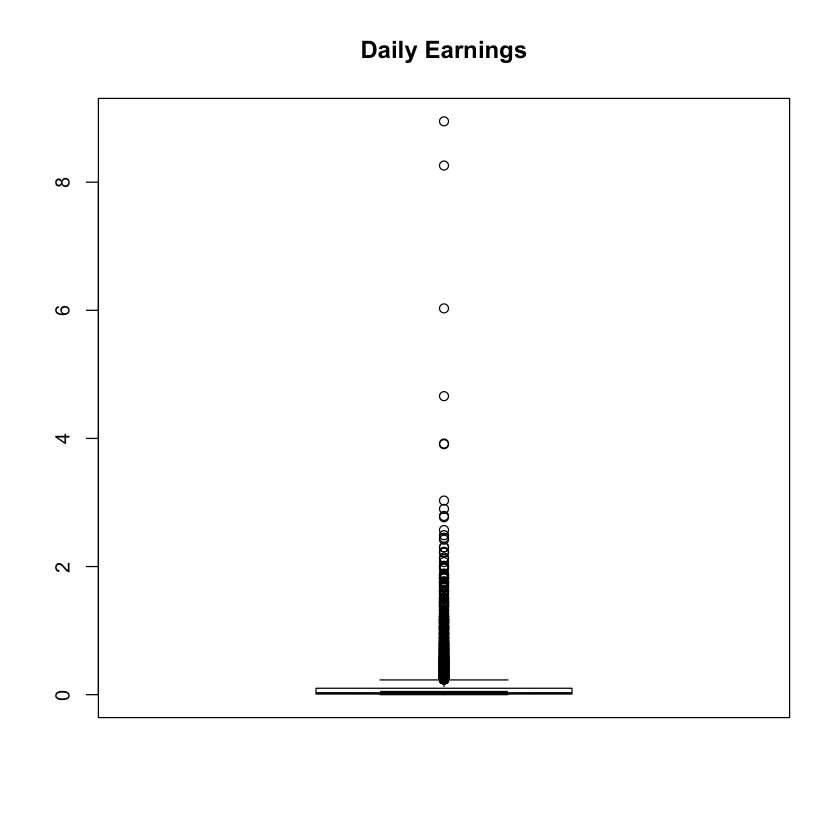

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     8.0    15.0    22.3    28.0   216.0 

[1] 22.97595

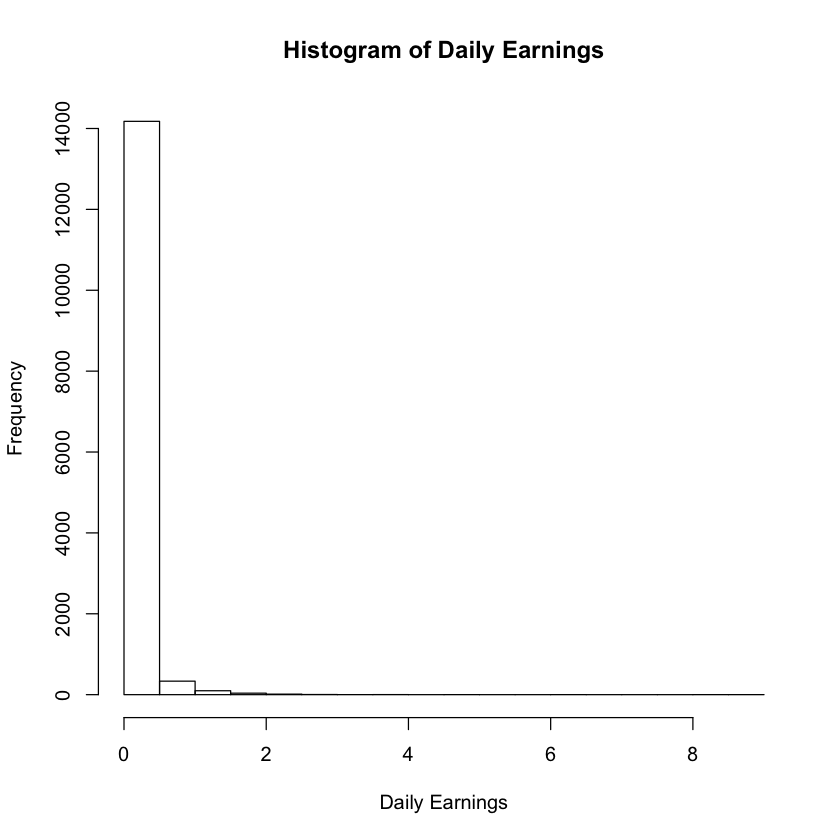

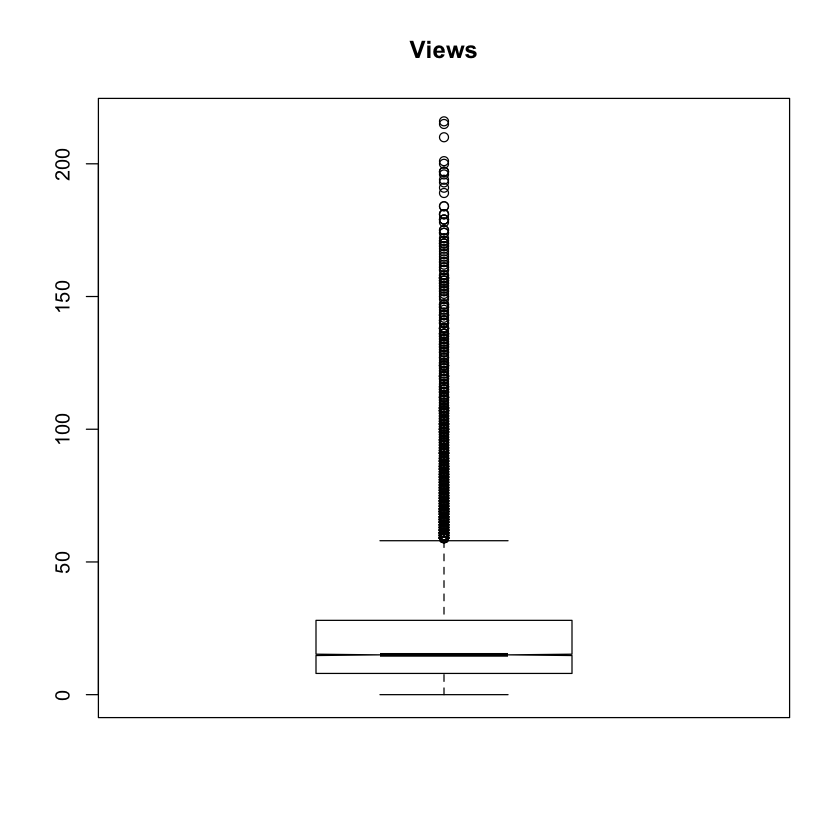

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.310   3.120   3.232   4.000  22.510 

[1] 1.47565

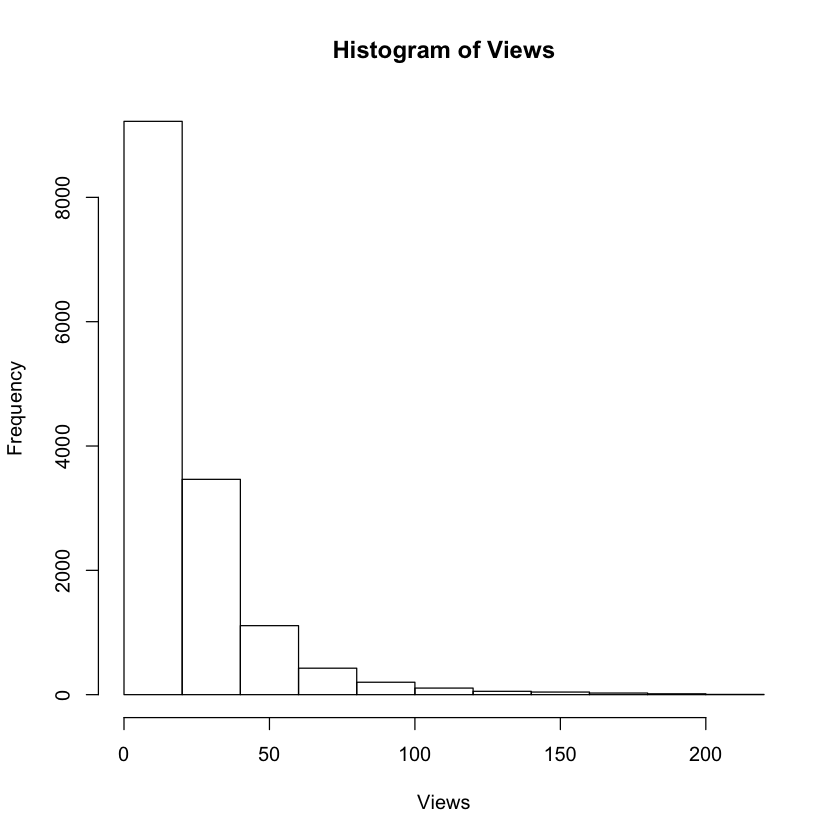

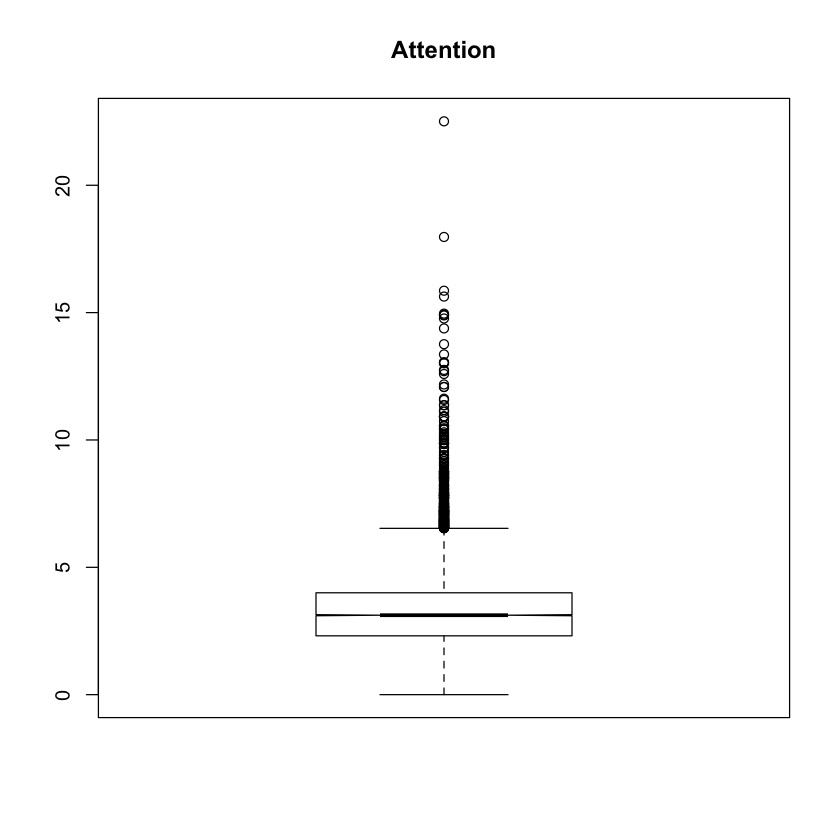

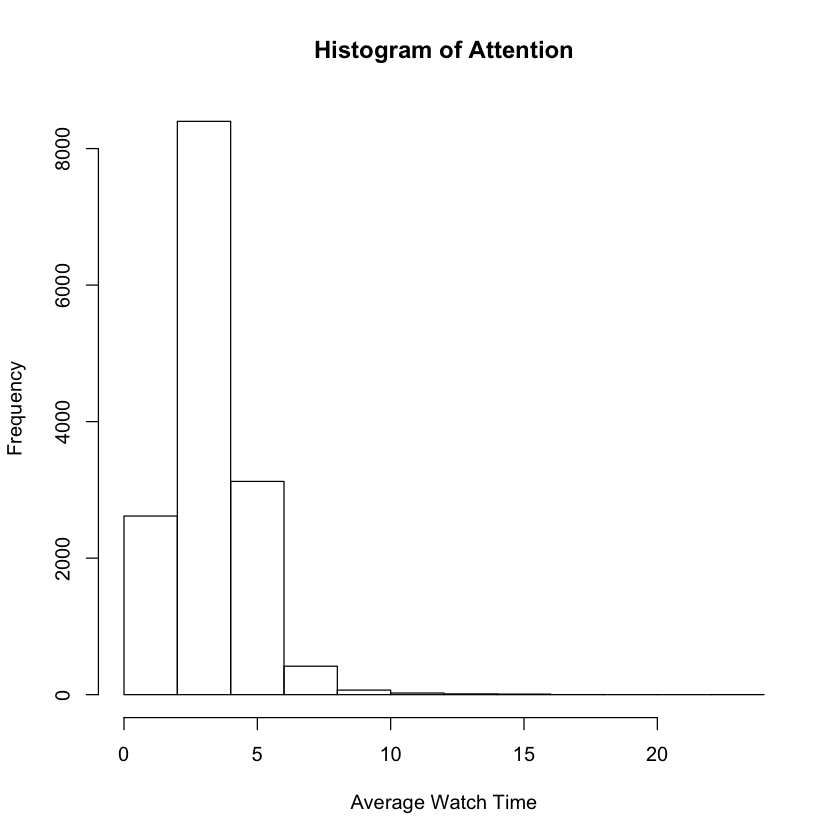

In [11]:
# summarize data
summary(fulldata$daily_earnings)
sd(fulldata$daily_earnings)
boxplot(fulldata$daily_earnings,
        main="Daily Earnings",
        notch = TRUE)
hist(fulldata$daily_earnings,
     main = "Histogram of Daily Earnings",
     xlab = "Daily Earnings")

summary(fulldata$Views)
sd(fulldata$Views)
boxplot(fulldata$Views,
        main="Views",
        notch = TRUE)
hist(fulldata$Views,
     main = "Histogram of Views",
     xlab = "Views")

summary(fulldata$average_watch_time)
sd(fulldata$average_watch_time)
boxplot(fulldata$average_watch_time,
        main="Attention",
        notch = TRUE)
hist(fulldata$average_watch_time,
     main = "Histogram of Attention",
     xlab = "Average Watch Time")

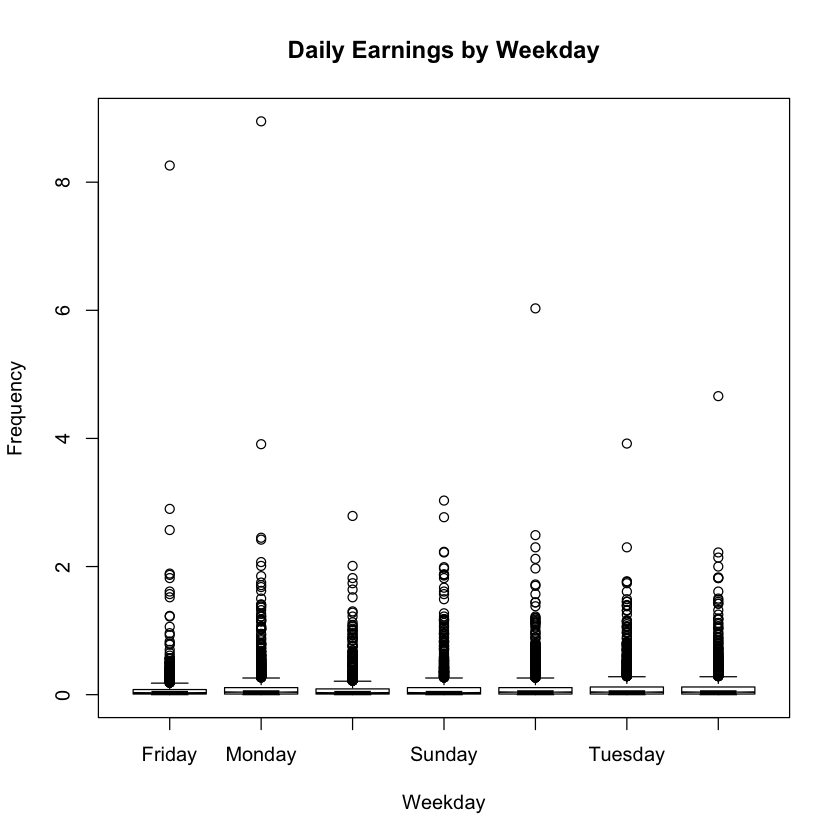

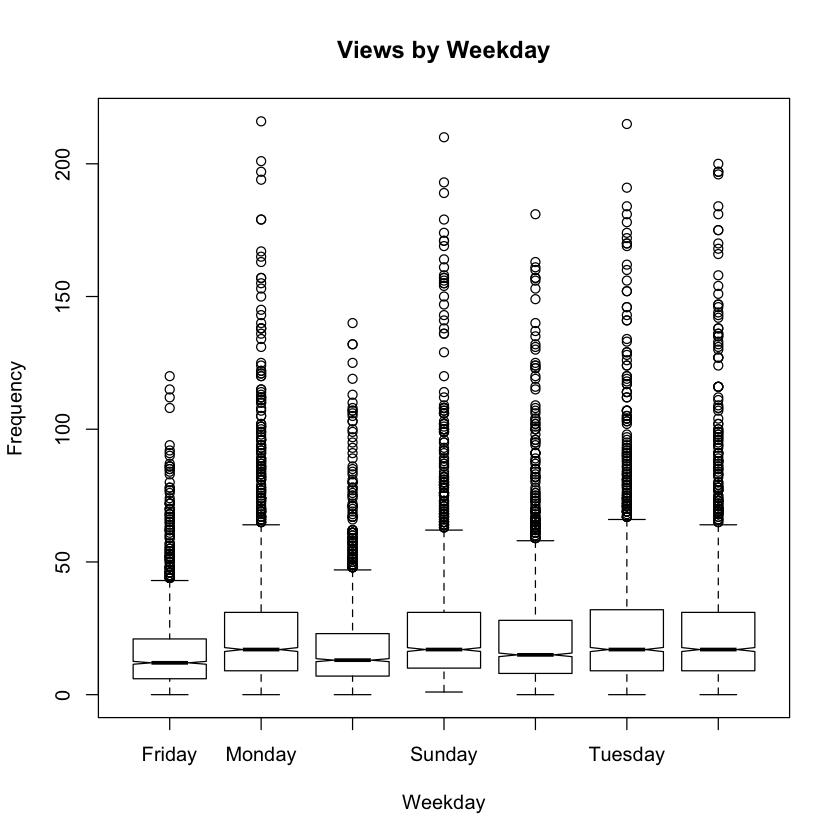

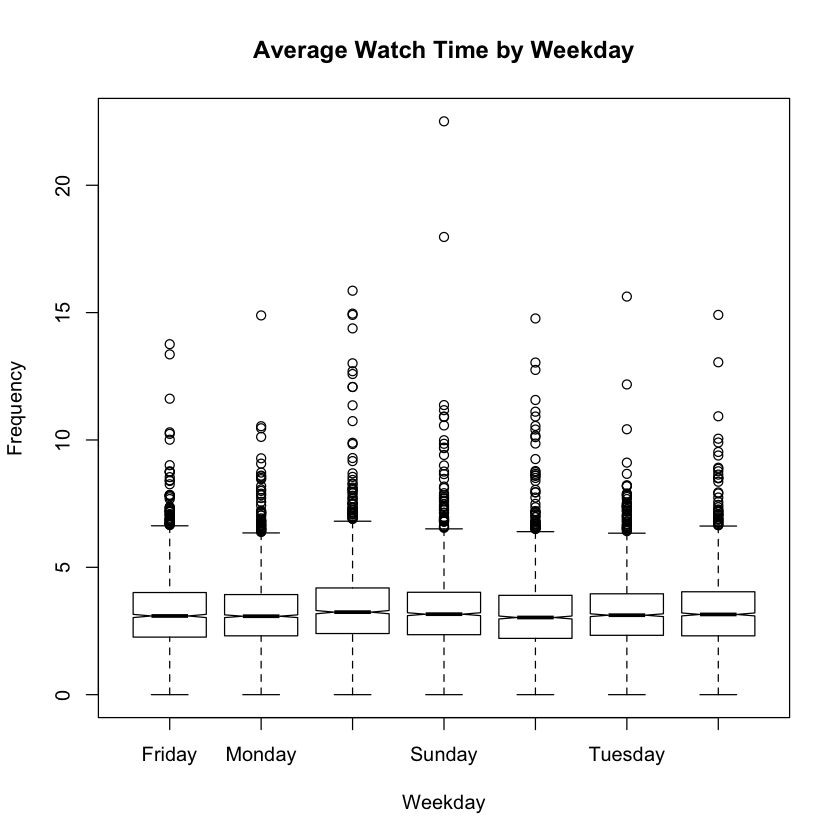

In [12]:
# create weekday variable
fulldata$weekday <- weekdays(fulldata$Date)

# plot variables by weekday
boxplot(fulldata$daily_earnings ~ fulldata$weekday,
        main="Daily Earnings by Weekday",
        xlab="Weekday",
        ylab="Frequency",
        notch=TRUE)

boxplot(fulldata$Views ~ fulldata$weekday,
        main="Views by Weekday",
        xlab="Weekday",
        ylab="Frequency",
        notch=TRUE)

boxplot(fulldata$average_watch_time ~ fulldata$weekday,
        main="Average Watch Time by Weekday",
        xlab="Weekday",
        ylab="Frequency",
        notch=TRUE)

## Part 2
### Compare variables using t-tests and linear modeling

### Q1: compare pre-period (before Feb 5) and post-period effect on attention and views

In [13]:
# subset pre period sample
pre <- subset(fulldata, Date < as.numeric(as.Date("2013-02-05")))

# subset based on ads rolls
pre_roll <- subset(pre, annoy_before==1)
no_pre_roll <- subset(pre, annoy_before==0)

In [14]:
# compare means using aggregate
aggregate(average_watch_time ~ annoy_before, FUN=mean, data=pre)
aggregate(Views ~ annoy_before, FUN=mean, data=pre)

# compare means with t test
t.test(pre_roll$average_watch_time, no_pre_roll$average_watch_time, var.equal = TRUE)
t.test(pre_roll$Views, no_pre_roll$Views, var.equal = TRUE)

annoy_before,average_watch_time
0,3.330947
1,3.062200


annoy_before,Views
0,25.2962
1,20.5550



	Two Sample t-test

data:  pre_roll$average_watch_time and no_pre_roll$average_watch_time
t = -9.9195, df = 11526, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3218533 -0.2156403
sample estimates:
mean of x mean of y 
 3.062200  3.330947 



	Two Sample t-test

data:  pre_roll$Views and no_pre_roll$Views
t = -10.613, df = 11526, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.616868 -3.865515
sample estimates:
mean of x mean of y 
  20.5550   25.2962 


In [15]:
# compare means again with linear model
lm_attention_preroll = lm(average_watch_time ~ annoy_before, data = pre)
summary(lm_attention_preroll)

lm_views_preroll = lm(Views ~ annoy_before, data = pre)
summary(lm_views_preroll)


Call:
lm(formula = average_watch_time ~ annoy_before, data = pre)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3309 -0.9209 -0.1209  0.7691 14.6391 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.33095    0.01827 182.271   <2e-16 ***
annoy_before -0.26875    0.02709  -9.919   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.449 on 11526 degrees of freedom
Multiple R-squared:  0.008465,	Adjusted R-squared:  0.008379 
F-statistic:  98.4 on 1 and 11526 DF,  p-value: < 2.2e-16



Call:
lm(formula = Views ~ annoy_before, data = pre)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.296 -14.555  -6.555   6.704 190.704 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.2962     0.3013   83.95   <2e-16 ***
annoy_before  -4.7412     0.4467  -10.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.89 on 11526 degrees of freedom
Multiple R-squared:  0.009678,	Adjusted R-squared:  0.009592 
F-statistic: 112.6 on 1 and 11526 DF,  p-value: < 2.2e-16


### Q2: compare attention (average watch time), daily earnings, and views


Call:
lm(formula = daily_earnings ~ average_watch_time, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1858 -0.0897 -0.0652  0.0032  8.8464 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.082214   0.004646  17.697  < 2e-16 ***
average_watch_time 0.005762   0.001308   4.406 1.06e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2337 on 14667 degrees of freedom
Multiple R-squared:  0.001322,	Adjusted R-squared:  0.001254 
F-statistic: 19.42 on 1 and 14667 DF,  p-value: 1.058e-05


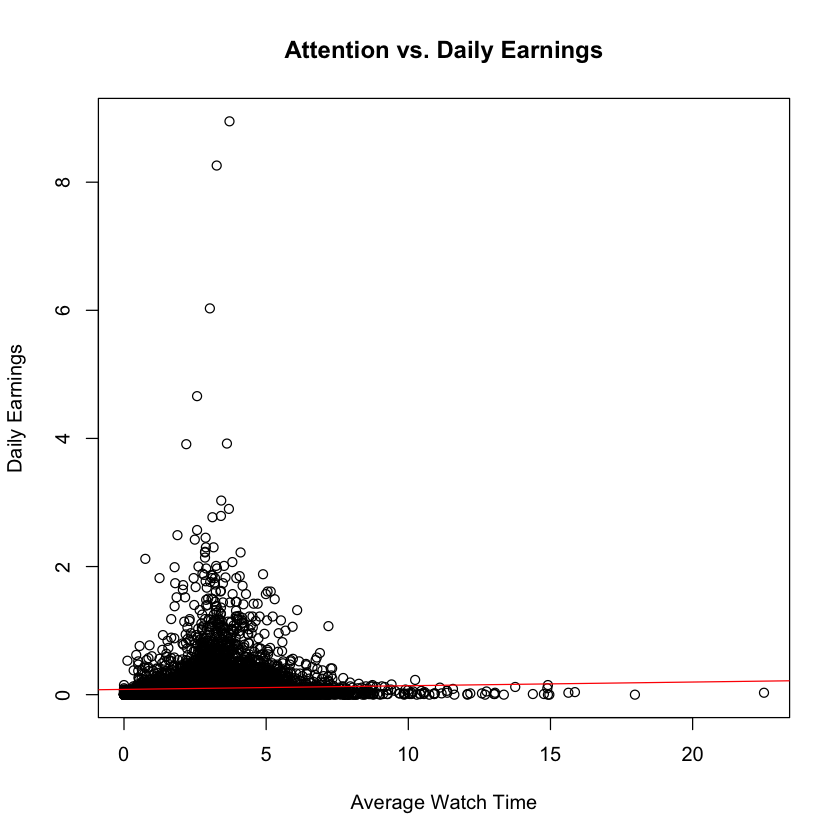

In [16]:
# compare average watch time and daily earnings
lm_earnings_attention = lm(daily_earnings~average_watch_time, data=fulldata)
summary(lm_earnings_attention)

plot(fulldata$average_watch_time, fulldata$daily_earnings,
     xlab = "Average Watch Time",
     ylab = "Daily Earnings",
     main = "Attention vs. Daily Earnings")
abline(lm_earnings_attention, col="red")


Call:
lm(formula = daily_earnings ~ Views, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6502 -0.0622 -0.0227  0.0165  8.5384 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.074e-03  2.392e-03  -1.285    0.199    
Views        4.659e-03  7.471e-05  62.360   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2079 on 14667 degrees of freedom
Multiple R-squared:  0.2096,	Adjusted R-squared:  0.2095 
F-statistic:  3889 on 1 and 14667 DF,  p-value: < 2.2e-16


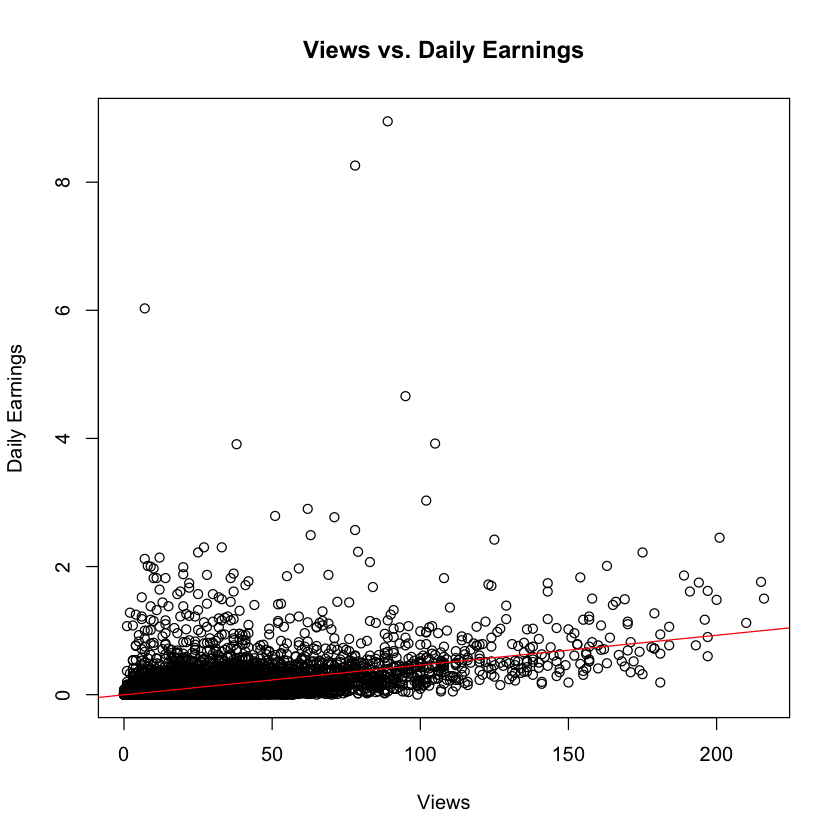

In [17]:
# compare views and daily earnings
lm_earnings_views = lm(daily_earnings~Views, data=fulldata)
summary(lm_earnings_views)

plot(fulldata$Views, fulldata$daily_earnings,
     xlab = "Views",
     ylab = "Daily Earnings",
     main = "Views vs. Daily Earnings")
abline(lm_earnings_views, col="red")


Call:
lm(formula = average_watch_time ~ Views, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1955 -0.9138 -0.1275  0.7726 19.3182 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.1898825  0.0169733 187.935  < 2e-16 ***
Views       0.0018860  0.0005301   3.558 0.000375 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.475 on 14667 degrees of freedom
Multiple R-squared:  0.0008624,	Adjusted R-squared:  0.0007942 
F-statistic: 12.66 on 1 and 14667 DF,  p-value: 0.0003749


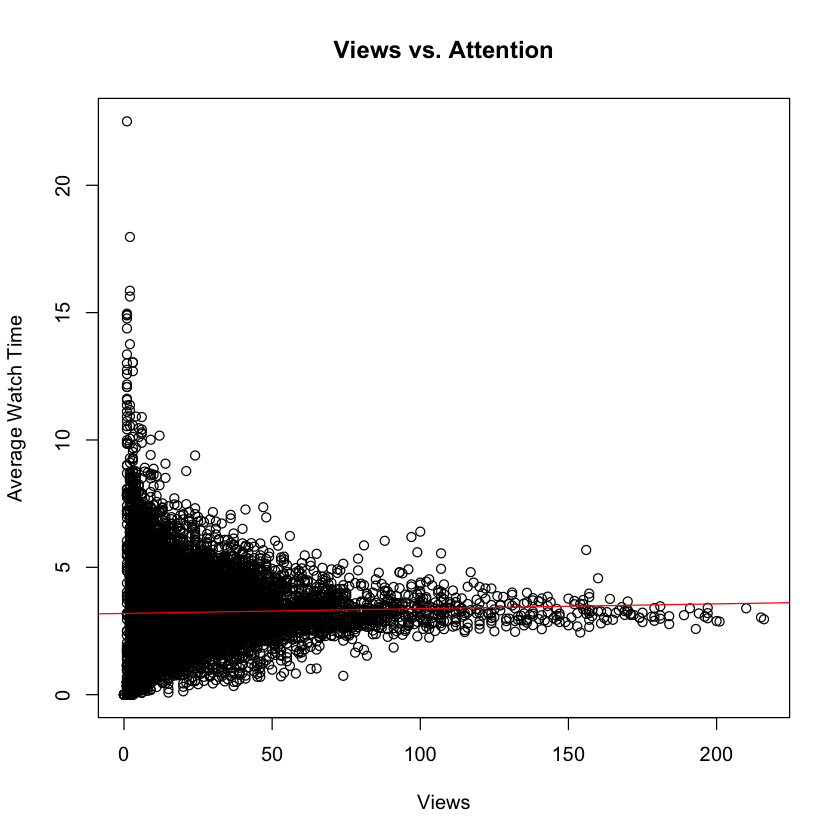

In [18]:
# compare average watch time and views
lm_attention_views = lm(average_watch_time~Views, data=fulldata)
summary(lm_attention_views)

plot(fulldata$Views, fulldata$average_watch_time,
     xlab = "Views",
     ylab = "Average Watch Time",
     main = "Views vs. Attention")
abline(lm_attention_views, col="red")

### Q3: compare daily earnings from pre-period to post-period

In [19]:
# create post variable
fulldata$post <- ifelse(fulldata$Date >= as.numeric(as.Date("2013-02-05")), 1, 0)

# run regression
lm_post <- lm(daily_earnings~post, data = fulldata)
summary(lm_post)


Call:
lm(formula = daily_earnings ~ post, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1056 -0.0956 -0.0656  0.0044  8.8444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.105610   0.002176  48.528  < 2e-16 ***
post        -0.022299   0.004703  -4.741 2.14e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2337 on 14667 degrees of freedom
Multiple R-squared:  0.00153,	Adjusted R-squared:  0.001462 
F-statistic: 22.48 on 1 and 14667 DF,  p-value: 2.143e-06


### Q4: compare daily earnings from pre-period videos without ads to post-period videos with ads

In [20]:
# subset post period
fulldata$annoy_later <- ifelse(fulldata$annoy_before==0 & fulldata$annoy_after==1,1,0)

# run regression
lm_after <- lm(daily_earnings~annoy_later, data = fulldata)
summary(lm_after)


Call:
lm(formula = daily_earnings ~ annoy_later, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1242 -0.0842 -0.0628  0.0058  8.8258 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.072848   0.002843   25.62   <2e-16 ***
annoy_later 0.051401   0.003854   13.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2324 on 14667 degrees of freedom
Multiple R-squared:  0.01199,	Adjusted R-squared:  0.01192 
F-statistic: 177.9 on 1 and 14667 DF,  p-value: < 2.2e-16


### Q5: compare daily earnings with both regressions from Q3 and Q4

In [21]:
# run multiple regression
lm_multiple_earnings <- lm(daily_earnings ~ annoy_later*post, data = fulldata)
summary(lm_multiple_earnings)


Call:
lm(formula = daily_earnings ~ annoy_later * post, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1343 -0.0770 -0.0570  0.0057  8.8157 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.071195   0.003203  22.224  < 2e-16 ***
annoy_later       0.063143   0.004339  14.552  < 2e-16 ***
post              0.007684   0.006908   1.112    0.266    
annoy_later:post -0.054975   0.009374  -5.865  4.6e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.232 on 14665 degrees of freedom
Multiple R-squared:  0.01581,	Adjusted R-squared:  0.0156 
F-statistic: 78.51 on 3 and 14665 DF,  p-value: < 2.2e-16


### Q6: repeat Q3-Q5 but for attention

In [22]:
# run regression
lm_post_attention <- lm(average_watch_time~post, data = fulldata)
summary(lm_post_attention)

lm_after_attention <- lm(average_watch_time~annoy_later, data = fulldata)
summary(lm_after_attention)

lm_multiple_attention <- lm(average_watch_time ~ annoy_later*post, data = fulldata)
summary(lm_multiple_attention)


Call:
lm(formula = average_watch_time ~ post, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3174 -0.9187 -0.1087  0.7713 19.1926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.20867    0.01374 233.562  < 2e-16 ***
post         0.10869    0.02969   3.661 0.000252 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.475 on 14667 degrees of freedom
Multiple R-squared:  0.0009129,	Adjusted R-squared:  0.0008448 
F-statistic:  13.4 on 1 and 14667 DF,  p-value: 0.0002522



Call:
lm(formula = average_watch_time ~ annoy_later, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3416 -0.9216 -0.1216  0.7692 19.4092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.10082    0.01799 172.334   <2e-16 ***
annoy_later  0.24082    0.02438   9.876   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.471 on 14667 degrees of freedom
Multiple R-squared:  0.006606,	Adjusted R-squared:  0.006538 
F-statistic: 97.53 on 1 and 14667 DF,  p-value: < 2.2e-16



Call:
lm(formula = average_watch_time ~ annoy_later * post, data = fulldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3811 -0.9209 -0.1209  0.7691 19.2682 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.06220    0.02030 150.866  < 2e-16 ***
annoy_later       0.26875    0.02749   9.775  < 2e-16 ***
post              0.17960    0.04377   4.103 4.09e-05 ***
annoy_later:post -0.12947    0.05940  -2.180   0.0293 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.47 on 14665 degrees of freedom
Multiple R-squared:  0.007851,	Adjusted R-squared:  0.007648 
F-statistic: 38.68 on 3 and 14665 DF,  p-value: < 2.2e-16


## Part 3
### Decide if YouTuber should include pre-roll ads

In [23]:
# compare tradeoff in daily earnings
# calculate difference in earnings when there are ads vs not
earnings_ads <- 0.071195 + 0.063143*1 + 0.007684*1 - 0.054975*1
earnings_ads

earnings_no_ads <- 0.071195 + 0.063143*0 + 0.007684*0 - 0.054975*0
earnings_no_ads

earnings_ads - earnings_no_ads

[1] 0.087047

[1] 0.071195

[1] 0.015852

In [24]:
# compare tradeoff in attention
# calculate difference in attention when there are ads vs not
attention_ads <- 3.06220 + 0.26875*1 + 0.17960*1 - 0.12947*1
attention_ads

attention_no_ads <- 3.06220 + 0.26875*0 + 0.17960*0 - 0.12947*0
attention_no_ads

attention_ads - attention_no_ads

[1] 3.38108

[1] 3.0622

[1] 0.31888

In [25]:
# run regressions on log y to calculate percent change
# remove 0's from data
earnings_no_zero <- subset(fulldata, daily_earnings != 0)
attention_no_zero <- subset(fulldata, average_watch_time != 0)

summary(lm(log(daily_earnings)~annoy_later*post, data = earnings_no_zero))
summary(lm(log(average_watch_time)~annoy_later*post, data = attention_no_zero))


Call:
lm(formula = log(daily_earnings) ~ annoy_later * post, data = earnings_no_zero)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9197 -0.9689 -0.0033  0.8529  4.8771 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      -3.21555    0.01976 -162.729  < 2e-16 ***
annoy_later       0.53006    0.02570   20.621  < 2e-16 ***
post              0.28845    0.03990    7.229 5.15e-13 ***
annoy_later:post -0.54607    0.05375  -10.160  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.216 on 11929 degrees of freedom
Multiple R-squared:  0.03455,	Adjusted R-squared:  0.03431 
F-statistic: 142.3 on 3 and 11929 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(average_watch_time) ~ annoy_later * post, data = attention_no_zero)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5994 -0.2155  0.0790  0.3303  2.0659 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.999409   0.007545 132.456  < 2e-16 ***
annoy_later       0.093409   0.010226   9.134  < 2e-16 ***
post              0.048686   0.016270   2.992  0.00277 ** 
annoy_later:post -0.032343   0.022076  -1.465  0.14292    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5459 on 14621 degrees of freedom
Multiple R-squared:  0.006868,	Adjusted R-squared:  0.006665 
F-statistic: 33.71 on 3 and 14621 DF,  p-value: < 2.2e-16


In [26]:
# calculate percent changes
earnings_pctChg <- 0.53006 + 0.28845 - 0.54607
earnings_pctChg

attention_pctChg <- 0.093409 + 0.048686 - 0.032343
attention_pctChg

[1] 0.27244

[1] 0.109752

## Because both attetion and daily earnings increase with ads, the YouTuber should include ads in their videos